In [ ]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation ,Flatten ,Dropout 
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D,MaxPooling2D,Conv2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
import tensorflow as tf

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

In [ ]:
train_path='/content/drive/MyDrive/senario1_224/train'
valid_path='/content/drive/MyDrive/senario1_224/valid'
test_path='/content/drive/MyDrive/senario1_224/test'
testC_path='/content/drive/MyDrive/senario1_224/testC'
testC2_path='/content/drive/MyDrive/senario2_224/testC'
IMAGE_SIZE = [224, 224]

In [ ]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size= IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
'''
imname='/content/drive/MyDrive/s1_suez_jpg2/20141109.jpg'
Image(filename=imname)
preprocessed_image = prepare_image(imname)
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results
'''

"\nimname='/content/drive/MyDrive/s1_suez_jpg2/20141109.jpg'\nImage(filename=imname)\npreprocessed_image = prepare_image(imname)\npredictions = mobile.predict(preprocessed_image)\nresults = imagenet_utils.decode_predictions(predictions)\nresults\n"

In [ ]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
for layer in base_model.layers:
  layer.trainable = False
#x=Dropout(.3)(base_model.output)
#x=MaxPooling2D( pool_size=(2, 2), strides=None, padding="same")(base_model.output)
#x=Conv2D(512,1, activation='relu', input_shape=(7,7,1024),strides=(1, 1), padding="valid")(base_model.output)
x=Flatten()(base_model.output)
preds=Dense(2, activation='sigmoid')(x)
#model = tf.keras.Sequential([
 # base_model,
 #  tf.keras.layers.Flatten,
   
 # tf.keras.layers.Dense(2, activation='sigmoid')
#])

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                  # rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip= True,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode="nearest"
                                   ) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True)

valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                               #   rescale = 1./255
                               )
valid_generator=valid_datagen.flow_from_directory(valid_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                  class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True)

validC_generator=valid_datagen.flow_from_directory(valid_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                  class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=False
                                                 )

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                              #  rescale = 1./255
                              )

test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 shuffle=True)


testC_generator=test_datagen.flow_from_directory(testC_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 shuffle=False)
testC2_generator=test_datagen.flow_from_directory(testC2_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 shuffle=False)

Found 113 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 13 images belonging to 1 classes.
Found 13 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


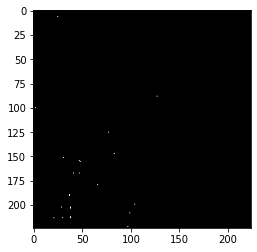

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow((testC_generator[1][0][0])*255)

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

#step_size_train=train_generator.n//train_generator.batch_size
r=model.fit(train_generator,
                   steps_per_epoch=8,
                   validation_data=valid_generator,
                    validation_steps=4,
                   epochs=50)

Epoch 1/50
8/8 [==============================] - 7s 353ms/step - loss: 1.1505 - accuracy: 0.7757 - val_loss: 1.2536 - val_accuracy: 0.8846
Epoch 2/50
8/8 [==============================] - 1s 148ms/step - loss: 0.3814 - accuracy: 0.9013 - val_loss: 0.6728 - val_accuracy: 0.9231
Epoch 3/50
8/8 [==============================] - 1s 142ms/step - loss: 1.5407e-05 - accuracy: 1.0000 - val_loss: 0.3775 - val_accuracy: 0.9231
Epoch 4/50
8/8 [==============================] - 1s 144ms/step - loss: 0.8800 - accuracy: 0.9667 - val_loss: 1.8645 - val_accuracy: 0.8846
Epoch 5/50
8/8 [==============================] - 1s 157ms/step - loss: 0.0889 - accuracy: 0.9922 - val_loss: 0.7066 - val_accuracy: 0.9231
Epoch 6/50
8/8 [==============================] - 1s 143ms/step - loss: 0.3394 - accuracy: 0.9729 - val_loss: 0.5414 - val_accuracy: 0.9231
Epoch 7/50
8/8 [==============================] - 1s 142ms/step - loss: 0.4173 - accuracy: 0.9668 - val_loss: 3.4044 - val_accuracy: 0.8846
Epoch 8/50
8/8 [

In [ ]:
model.evaluate(train_generator)
model.evaluate(valid_generator)
model.evaluate(testC2_generator)

2/2 [==============================] - 0s 36ms/step - loss: 22.6636 - accuracy: 0.6875


[22.663604736328125, 0.6875]

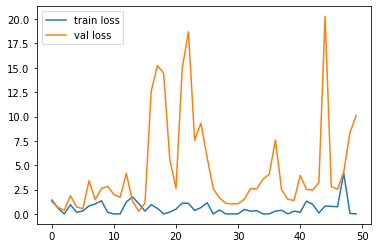

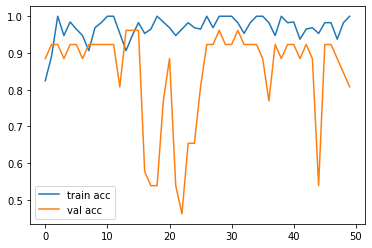

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from keras.models import load_model
modelsavedir='/content/drive/MyDrive/senario1_model/'
modelname='spill_new_mobilenet_model.h5'
model.save(modelsavedir+modelname)
#np.save(modelsavedir+'good2.npy',r.history)

from tensorflow.keras.models import load_model
new_model = load_model(modelsavedir+modelname)

In [ ]:
import sklearn.metrics as metrics
probabilities = new_model.predict(testC2_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC2_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC2_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1]
True
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
[[7 5]
 [0 4]]
              precision    recall  f1-score   support

    notspill       1.00      0.58      0.74        12
       spill       0.44      1.00      0.62         4

    accuracy                           0.69        16
   macro avg       0.72      0.79      0.68        16
weighted avg       0.86      0.69      0.71        16



In [ ]:
import sklearn.metrics as metrics
probabilities = new_model.predict(testC_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [0 1 0 0 0 0 0 1 1 1 1 1 1]
True
 [0 0 0 0 0 0 0 0 0 0 1 1 1]
[[6 4]
 [0 3]]
              precision    recall  f1-score   support

    notspill       1.00      0.60      0.75        10
       spill       0.43      1.00      0.60         3

    accuracy                           0.69        13
   macro avg       0.71      0.80      0.67        13
weighted avg       0.87      0.69      0.72        13



In [ ]:
probabilities = new_model.predict(validC_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = validC_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(validC_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
True
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[[15  5]
 [ 0  6]]
              precision    recall  f1-score   support

    notspill       1.00      0.75      0.86        20
       spill       0.55      1.00      0.71         6

    accuracy                           0.81        26
   macro avg       0.77      0.88      0.78        26
weighted avg       0.90      0.81      0.82        26



In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224,224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:

#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = '/content/drive/MyDrive/s1_suez_jpg2/20180715.jpg'
new_image = load_image(img_path)
pred = model.predict(new_image)
pred

array([[0.11895771, 0.57431996]], dtype=float32)